In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from itertools import combinations

In [72]:
def entropy(p):
    p = p + 1e-10
    p = p / np.sum(p)
    return -np.sum(p * np.log2(p))

def comb(n, k):
    return np.array(list(combinations(range(1, n+1), k)))

def get_k_to_num_sequences(df, wt_sequences, all_possibilities=False):

    n = len(df)

    aminoacids = df.columns.values
    aa_to_idx = {aa: i for i, aa in enumerate(aminoacids)}

    k_to_num_sequences = {}

    for k in range(0, n+1):
        combos = comb(n, k) # combinations are of indices to vary, not keep same as WT

        num_sequences = 0
        for c_idxs in combos:
            sub_pwm_df = df.loc[c_idxs, :]
            curr_num_seq = 1
            for i in c_idxs:
                probas = sub_pwm_df.loc[i, :].values

                # need to exclude the WT amino-acid
                idxs_to_exclude = []
                for wt_seq in wt_sequences:
                    idxs_to_exclude.append(aa_to_idx[wt_seq[i-1]])
                probas = np.delete(probas, idxs_to_exclude)

                if all_possibilities:
                    curr_num_seq *= len(probas)
                else:
                    curr_num_seq *= 2**entropy(probas)
            
            num_sequences += curr_num_seq
        
        k_to_num_sequences[k] = num_sequences
    
    return k_to_num_sequences

In [8]:
df = pd.read_csv('../auxiliary_data/class_I_A0201_9_pwm.csv', index_col=0)
wt_sequences = ['SLLMWITQC', 'SLLMWITQV']
k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences)
# with open('../nyeso/post_experiment_analysis/mhc_constrainted_class_I_A0101_9_nyeso_k_to_num_sequences.json', 'w') as f:
#     json.dump(k_to_num_sequences, f, indent=4)
print(k_to_num_sequences)

df = pd.read_csv('../auxiliary_data/class_I_A0101_9_pwm.csv', index_col=0)
wt_sequences = ['EVDPIGHLY', 'ESDPIVAQY']
k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences)
# with open('../magea3_and_titin/post_experiment_analysis/mhc_constrainted_class_I_A0201_9_mage_k_to_num_sequences.json', 'w') as f:
#     json.dump(k_to_num_sequences, f, indent=4)
print(k_to_num_sequences)

df = pd.read_csv('../auxiliary_data/class_I_B3501_11_pwm.csv', index_col=0)
wt_sequences = ['HPVGEADYFEY', 'HPVGQADYFEY']
k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences)
# with open('../ebv/post_experiment_analysis/mhc_constrainted_class_I_B3501_11_ebv_k_to_num_sequences.json', 'w') as f:
#     json.dump(k_to_num_sequences, f, indent=4)
print(k_to_num_sequences)



NameError: name 'get_k_to_num_sequences' is not defined

In [76]:
# df = pd.read_csv('../auxiliary_data/class_I_A0101_9_pwm.csv', index_col=0)
# wt_sequences = ['SLLMWITQC', 'SLLMWITQV']
# k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences)
# # with open('../nyeso/post_experiment_analysis/mhc_constrainted_class_I_A0101_9_nyeso_k_to_num_sequences.json', 'w') as f:
# #     json.dump(k_to_num_sequences, f, indent=4)
# print(k_to_num_sequences)

# df = pd.read_csv('../auxiliary_data/class_I_A0201_9_pwm.csv', index_col=0)
# wt_sequences = ['EVDPIGHLY', 'ESDPIVAQY']
# k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences)
# # with open('../magea3_and_titin/post_experiment_analysis/mhc_constrainted_class_I_A0201_9_mage_k_to_num_sequences.json', 'w') as f:
# #     json.dump(k_to_num_sequences, f, indent=4)
# print(k_to_num_sequences)

# df = pd.read_csv('../auxiliary_data/class_I_B3501_11_pwm.csv', index_col=0)
# wt_sequences = ['HPVGEADYFEY', 'HPVGQADYFEY']
# k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences)
# # with open('../ebv/post_experiment_analysis/mhc_constrainted_class_I_B3501_11_ebv_k_to_num_sequences.json', 'w') as f:
# #     json.dump(k_to_num_sequences, f, indent=4)
# print(k_to_num_sequences)

# computed by armita
# B3501 : {123, 6698, 212272, 4327296, 59171840, 548667392, 3404464128,  13581156352, 32145145856}
# A0101 : {106, 4832, 123424, 1928192, 18866176, 113770496, 400556032}
# A0201 : {112, 5456, 151168, 2613248, 29065216, 206569472, 897581056, 2147483648}

with open('../nyeso/post_experiment_analysis/mhc_constrainted_class_I_A0101_9_nyeso_k_to_num_sequences.json', 'w') as f:
    json.dump(dict(zip([str(x) for x in range(1, 8)], [106, 4832, 123424, 1928192, 18866176, 113770496, 400556032])), f, indent=4)

with open('../magea3_and_titin/post_experiment_analysis/mhc_constrainted_class_I_A0201_9_mage_k_to_num_sequences.json', 'w') as f:
    json.dump(dict(zip([str(x) for x in range(1, 9)], [112, 5456, 151168, 2613248, 29065216, 206569472, 897581056, 2147483648])), f, indent=4)

with open('../ebv/post_experiment_analysis/mhc_constrainted_class_I_B3501_11_ebv_k_to_num_sequences.json', 'w') as f:
    json.dump(dict(zip([str(x) for x in range(1, 10)], [123, 6698, 212272, 4327296, 59171840, 548667392, 3404464128,  13581156352, 32145145856])), f, indent=4)


In [75]:
# df = pd.read_csv('../auxiliary_data/class_I_A0101_9_pwm.csv', index_col=0)
# wt_sequences = ['SLLMWITQC', 'SLLMWITQV']
# k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences, all_possibilities=True)
# # with open('../nyeso/post_experiment_analysis/all_possibilities_class_I_A0101_9_nyeso_k_to_num_sequences.json', 'w') as f:
# #     json.dump(k_to_num_sequences, f, indent=4)
# print(k_to_num_sequences)

# df = pd.read_csv('../auxiliary_data/class_I_A0201_9_pwm.csv', index_col=0)
# wt_sequences = ['EVDPIGHLY', 'ESDPIVAQY']
# k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences, all_possibilities=True)
# # with open('../magea3_and_titin/post_experiment_analysis/all_possibilities_class_I_A0201_9_mage_k_to_num_sequences.json', 'w') as f:
# #     json.dump(k_to_num_sequences, f, indent=4)
# print(k_to_num_sequences)

# df = pd.read_csv('../auxiliary_data/class_I_B3501_11_pwm.csv', index_col=0)
# wt_sequences = ['HPVGEADYFEY', 'HPVGQADYFEY']
# k_to_num_sequences = get_k_to_num_sequences(df, wt_sequences, all_possibilities=True)
# # with open('../ebv/post_experiment_analysis/all_possibilities_class_I_B3501_11_ebv_k_to_num_sequences.json', 'w') as f:
# #     json.dump(k_to_num_sequences, f, indent=4)
# print(k_to_num_sequences)

# computed by armita
# B3501: {209, 19855, 1131735, 43005930, 1143957738, 21735197022, 294977673870, 2802287901765, 17747823377845}
# A0101 & A0201: {171, 12996, 576156, 16420446, 311988474, 3951854004, 32179382604, 152852067369, 322687697779}

with open('../nyeso/post_experiment_analysis/all_possibilities_class_I_A0101_9_nyeso_k_to_num_sequences.json', 'w') as f:
    json.dump(dict(zip([str(x) for x in range(1, 10)], [171, 12996, 576156, 16420446, 311988474, 3951854004, 32179382604, 152852067369, 322687697779])), f, indent=4)

with open('../magea3_and_titin/post_experiment_analysis/all_possibilities_class_I_A0201_9_mage_k_to_num_sequences.json', 'w') as f:
    json.dump(dict(zip([str(x) for x in range(1, 10)], [171, 12996, 576156, 16420446, 311988474, 3951854004, 32179382604, 152852067369, 322687697779])), f, indent=4)

with open('../ebv/post_experiment_analysis/all_possibilities_class_I_B3501_11_ebv_k_to_num_sequences.json', 'w') as f:
    json.dump(dict(zip([str(x) for x in range(1, 10)], [209, 19855, 1131735, 43005930, 1143957738, 21735197022, 294977673870, 2802287901765, 17747823377845])), f, indent=4)


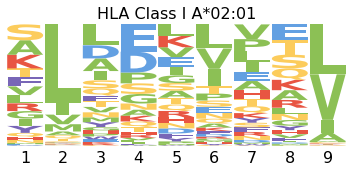

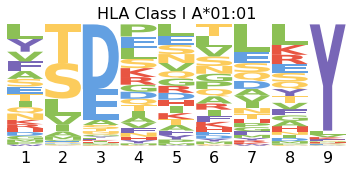

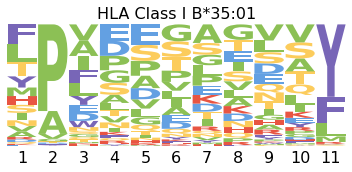

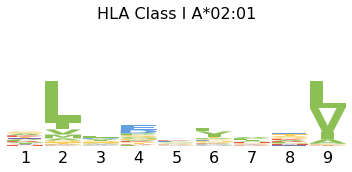

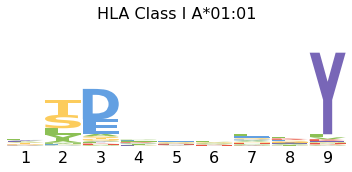

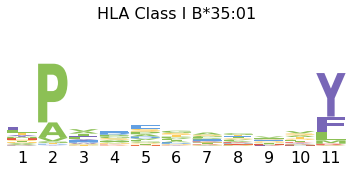

In [15]:
## plot pwms
import sys
sys.path.append('../../src/')
from global_constants import LOGOMAKER_COLORS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import logomaker

fontsize = 16

def entropy(p):
    return -np.nansum(p * np.log2(p + 1e-10))

def plot_pwm_logo(name, title, use_entropy=False):

    df = pd.read_csv(f'../auxiliary_data/{name}.csv', index_col=0)

    if use_entropy:
        ics = []
        for row in df.values:
            ics.append(np.log2(20) - entropy(row))
        ics = np.array(ics)
        df = pd.DataFrame(df.values * ics[:, np.newaxis], index=df.index, columns=df.columns)

    plt.figure(figsize=(5, 2.5))
    ax = plt.gca()
    df_pwm = pd.DataFrame(df.values, columns=df.columns)
    logomaker.Logo(df_pwm, ax=ax, color_scheme=LOGOMAKER_COLORS)

    if use_entropy:
        ax.set_ylim([0, np.log2(20)])
    else:
        ax.set_ylim([0, 1])

    ax.set_title(title, fontsize=fontsize)

    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(np.arange(len(df))+1)

    ax.tick_params(axis='x', labelsize=fontsize)

    ax.set_yticks([])

    # Remove x-tick marks but keep the labels
    ax.tick_params(axis='x', which='both', length=0)

    # Remove all the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if use_entropy:
        use_entropy_str = '_norm_entropy'
    else:
        use_entropy_str = ''

    plt.tight_layout()
    plt.savefig(f'../auxiliary_data/{name.replace("pwm", "logoplot")}{use_entropy_str}.png')
    plt.savefig(f'../auxiliary_data/{name.replace("pwm", "logoplot")}{use_entropy_str}.pdf')
    plt.show()

plot_pwm_logo('class_I_A0201_9_pwm', 'HLA Class I A*02:01')
plot_pwm_logo('class_I_A0101_9_pwm', 'HLA Class I A*01:01')
plot_pwm_logo('class_I_B3501_11_pwm', 'HLA Class I B*35:01')

plot_pwm_logo('class_I_A0201_9_pwm', 'HLA Class I A*02:01', use_entropy=True)
plot_pwm_logo('class_I_A0101_9_pwm', 'HLA Class I A*01:01', use_entropy=True)
plot_pwm_logo('class_I_B3501_11_pwm', 'HLA Class I B*35:01', use_entropy=True)
